<a href="https://colab.research.google.com/github/handsomekiwi/JupyterPractice/blob/master/ML_course_HW/Y2019%20HW9_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
import matplotlib.pyplot as plt 
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalMaxPooling2D
import os  

Using TensorFlow backend.


In [0]:
def isDisplayAvl():  
    return 'DISPLAY' in os.environ.keys()  

In [0]:
def plot_image(image):  
    fig = plt.gcf()  
    fig.set_size_inches(2,2)  
    plt.imshow(image, cmap='binary')  
    plt.show()  

In [0]:
def plot_images_labels_predict(images, labels, prediction, idx, num=10):  
    fig = plt.gcf()  
    fig.set_size_inches(12, 14)  
    if num > 25: num = 25  
    for i in range(0, num):  
        ax=plt.subplot(5,5, 1+i)  
        ax.imshow(images[idx], cmap='binary')  
        title = "l=" + str(labels[idx])  
        if len(prediction) > 0:  
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))  
        else:  
            title = "l={}".format(str(labels[idx]))  
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])  
        idx+=1  
    plt.show()  

In [0]:
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show() 

In [0]:
np.random.seed(10)

In [0]:
(x_train_image, y_train_label), (x_test_image, y_test_label)=cifar10.load_data()


In [0]:
# normalize and onehot
x_train_normalize=x_train_image.astype('float32')/255.0
x_test_normalize=x_test_image.astype('float32')/255.0  


y_train_onehot=np_utils.to_categorical(y_train_label)
y_test_onehot=np_utils.to_categorical(y_test_label)

In [9]:
#create model
model=Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 padding='same',
                 input_shape=(32,32,3),
                 activation='relu'))

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 padding='same',
                 input_shape=(32,32,32),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 padding='same',
                 input_shape=(16,16,32),
                 activation='relu'))

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 padding='same',
                 input_shape=(16,16,32),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 padding='same',
                 input_shape=(8,8,32),
                 activation='relu'))

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 padding='same',
                 input_shape=(8,8,32),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(10,activation='softmax'))

W0826 06:53:27.131970 139900489541504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0826 06:53:27.147046 139900489541504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0826 06:53:27.150037 139900489541504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0826 06:53:27.182297 139900489541504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0826 06:53:27.243048 139900489541504 deprecation_wrapp

In [10]:
#show the model
model.summary()  
print("") 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 32)          9248      
__________

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

train_history=model.fit(x=x_train_normalize, y=y_train_onehot, validation_split=0.2, epochs=10, batch_size=128,verbose=2)

W0826 06:53:27.350854 139900489541504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0826 06:53:27.385114 139900489541504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0826 06:53:27.489700 139900489541504 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 10s - loss: 1.8397 - acc: 0.3127 - val_loss: 1.4711 - val_acc: 0.4510
Epoch 2/10
 - 8s - loss: 1.4457 - acc: 0.4660 - val_loss: 1.2609 - val_acc: 0.5302
Epoch 3/10
 - 8s - loss: 1.2762 - acc: 0.5378 - val_loss: 1.1170 - val_acc: 0.5916
Epoch 4/10
 - 8s - loss: 1.1649 - acc: 0.5823 - val_loss: 1.0244 - val_acc: 0.6288
Epoch 5/10
 - 8s - loss: 1.0696 - acc: 0.6209 - val_loss: 0.9968 - val_acc: 0.6511
Epoch 6/10
 - 8s - loss: 1.0043 - acc: 0.6443 - val_loss: 0.9049 - val_acc: 0.6856
Epoch 7/10
 - 8s - loss: 0.9586 - acc: 0.6630 - val_loss: 0.8693 - val_acc: 0.6866
Epoch 8/10
 - 8s - loss: 0.9179 - acc: 0.6760 - val_loss: 0.8206 - val_acc: 0.7104
Epoch 9/10
 - 8s - loss: 0.8724 - acc: 0.6946 - val_loss: 0.7956 - val_acc: 0.7191
Epoch 10/10
 - 8s - loss: 0.8408 - acc: 0.7041 - val_loss: 0.7922 - val_acc: 0.7195


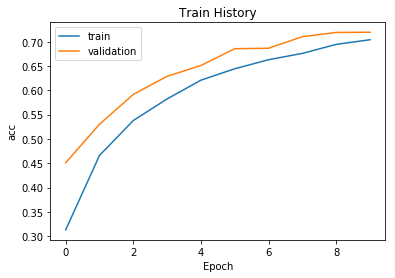

In [12]:
show_train_history(train_history, 'acc', 'val_acc')

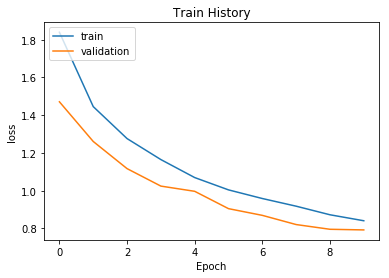

In [13]:
show_train_history(train_history, 'loss', 'val_loss')

In [15]:
scores = model.evaluate(x_test_normalize, y_test_onehot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0)) 

10000/10000 [==============================] - 1s 139us/step

	[Info] Accuracy of testing data = 71.3%
